# Eksploracja Danych 

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [13]:
fifa_data = pd.read_csv('csv/data_new_classes.csv')

In [14]:
def draw_countplot(col):
    sns.countplot(col, order=col.value_counts().index)

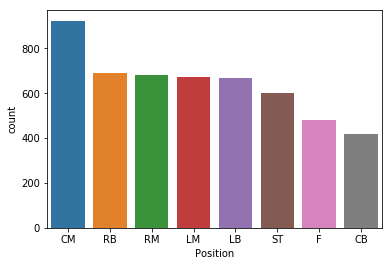

In [15]:
position = fifa_data['Position']
draw_countplot(position)

tutaj możemy zrobić wniosek że dane są w dużym stopniu niezbalansowane. Aby uzyskać klasyfikator o dużej wydajności musimy podjąć pewne działania. Po pierwsze chciałbym zauważyć że 3 klasy, którę mają najmniejszą liczbę wystąpień, czyli `LF`, `RF` oraz `CF`, tworzę podgrupę graczy typu `Forward`. Więc pierwszym krokiem będzie połączenie tych klas do jednej klasy `Forward`.

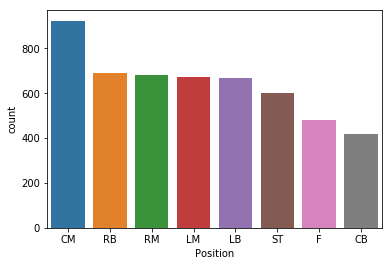

In [16]:
new_position = position.apply(lambda x: x if x not in ['LF','CF','RF'] else 'F')
draw_countplot(new_position)

Na danym wykresie widzimy że sytuacja wygląda troche lepiej, ale nadal nie idelnie. Następnym krokiem jest prowadznie undersamplingu lub oversamplingu, albo połączenie tych metod.

## Analiza Rozkładu Wybranyh Cech

Rozkład cech `Overall`, `Age`, `Height`, `Weight` wg `Position`

<Figure size 864x576 with 0 Axes>

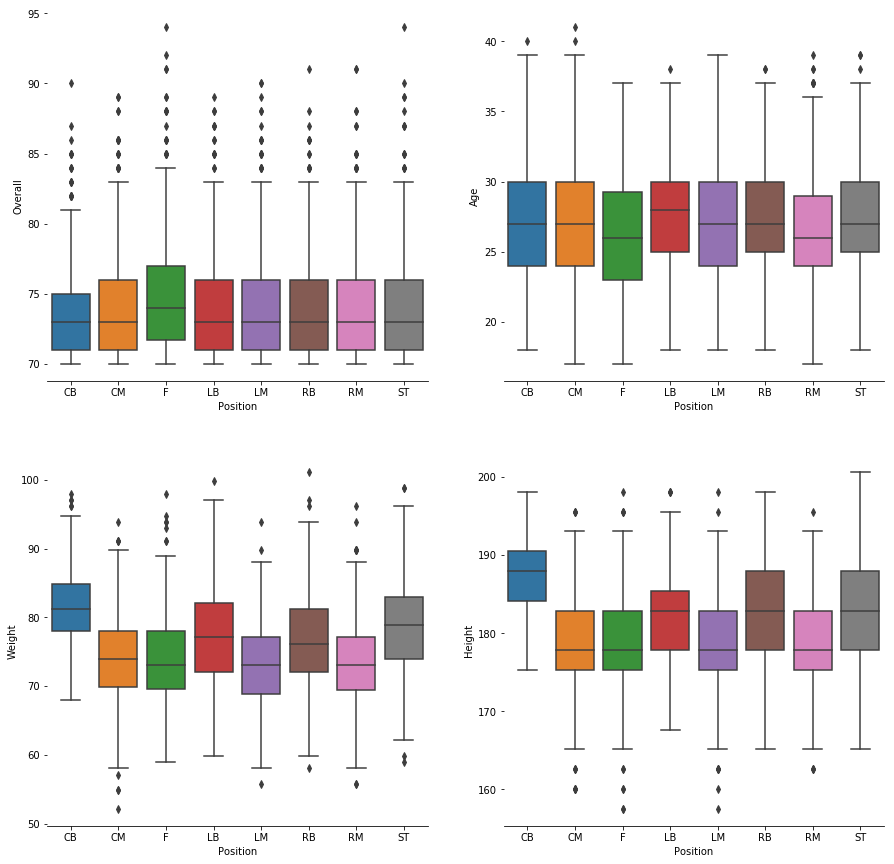

In [18]:
plt.figure(figsize=(12, 8))

f, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=False)
sns.despine(left=True)

positions = sorted(fifa_data['Position'].unique())

sns.boxplot('Position', 'Overall', data = fifa_data, ax=axes[0, 0], order=positions)
sns.boxplot('Position', 'Age', data = fifa_data, ax=axes[0, 1],order=positions)
sns.boxplot('Position', 'Height', data = fifa_data, ax=axes[1, 1], order=positions)
sns.boxplot('Position', 'Weight', data = fifa_data, ax=axes[1, 0], order=positions)

## Korelacja pomiędzy cechami

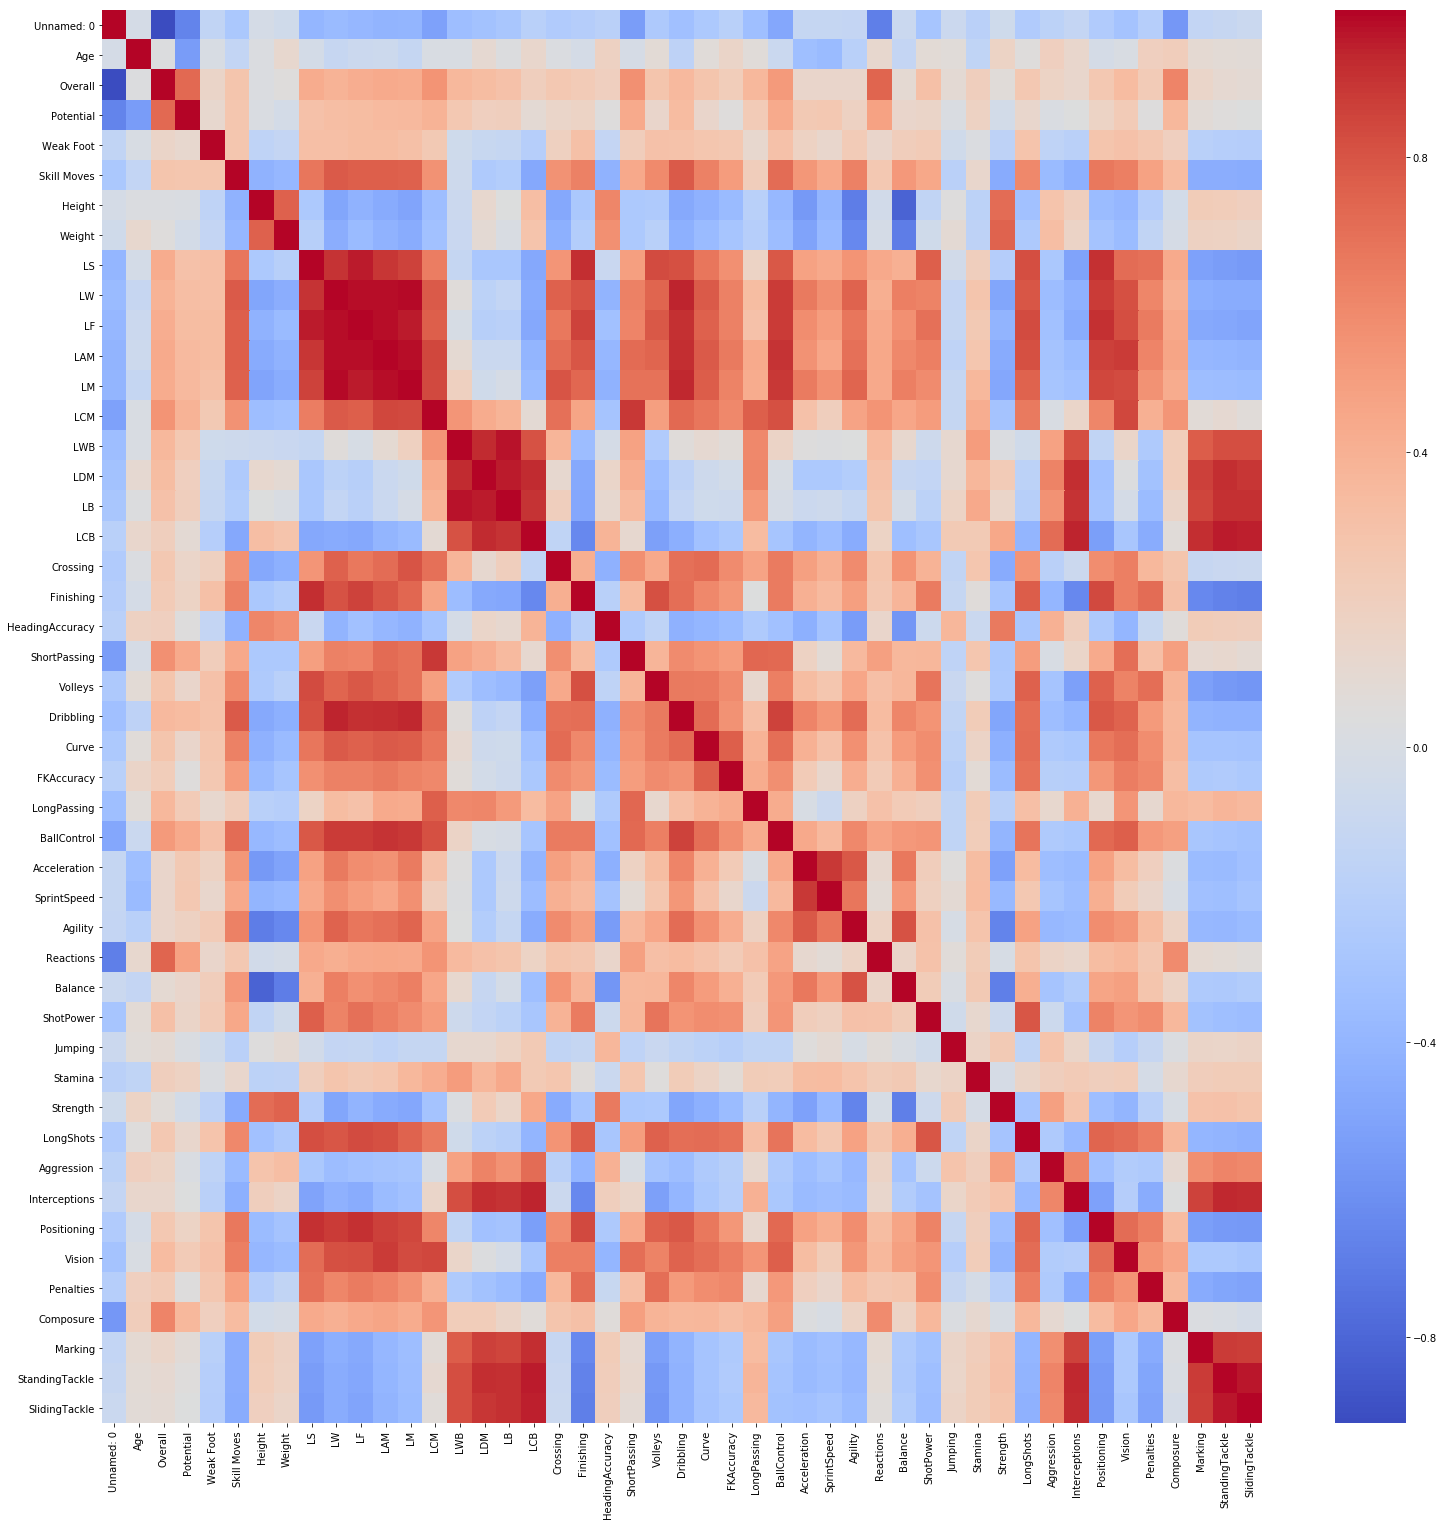

In [19]:
corr = fifa_data.corr()

plt.figure(figsize=(26,26))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap='coolwarm')

In [20]:
CORRELATION_THRESHLOD = 0.75

correlated_features = set()
for i in range(len(corr.columns)):  
    for j in range(i):
        if abs(corr.iloc[i, j]) > CORRELATION_THRESHLOD:
            colname = corr.columns[i]
            correlated_features.add(colname)

In [21]:
len(correlated_features)

31

In [22]:
correlated_features

{'Agility',
 'Balance',
 'BallControl',
 'Crossing',
 'Curve',
 'Dribbling',
 'FKAccuracy',
 'Finishing',
 'Interceptions',
 'LAM',
 'LB',
 'LCB',
 'LCM',
 'LDM',
 'LF',
 'LM',
 'LW',
 'LongPassing',
 'LongShots',
 'Marking',
 'Overall',
 'Positioning',
 'ShortPassing',
 'ShotPower',
 'SlidingTackle',
 'SprintSpeed',
 'StandingTackle',
 'Strength',
 'Vision',
 'Volleys',
 'Weight'}

In [23]:
no_corr_fifa_data = fifa_data.drop(columns=correlated_features, axis=1)

In [24]:
no_corr_fifa_data.shape

(5137, 20)

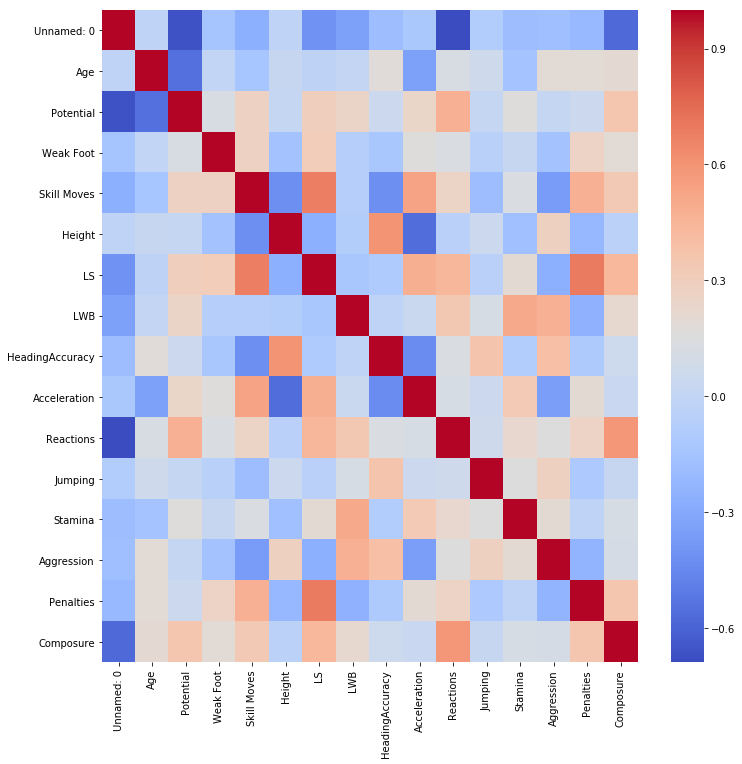

In [25]:
plt.figure(figsize=(12,12))
sns.heatmap(no_corr_fifa_data.corr(), cmap='coolwarm')

In [26]:
def draw_distplot(data):
    sns.distplot(data)

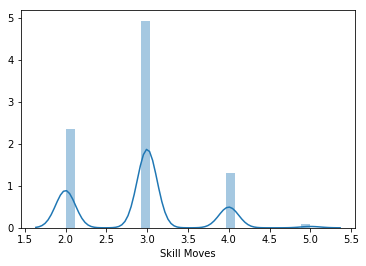

In [27]:
draw_distplot(fifa_data['Skill Moves'])

In [28]:
def draw_boxplot(data, col_a, col_b):
    plt.figure(figsize=(12,8))
    sns.boxplot(col_a, col_b, data = data)

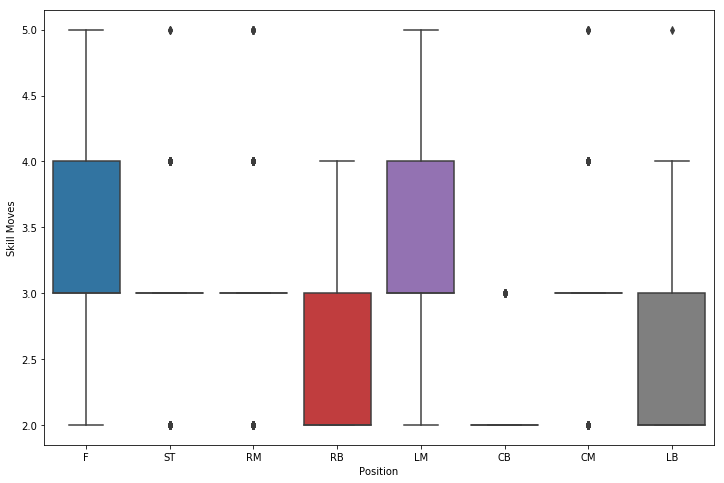

In [29]:
draw_boxplot(fifa_data, 'Position', 'Skill Moves')

In [30]:
fifa_data['Skill Moves'].value_counts()

3.0    2926
2.0    1390
4.0     772
5.0      49
Name: Skill Moves, dtype: int64

In [31]:
fifa_data[fifa_data['Position'] == 'CB']['Skill Moves'].value_counts()

2.0    396
3.0     23
Name: Skill Moves, dtype: int64

In [32]:
for col in fifa_data.columns[1:]:
    print(col, len(fifa_data[col].value_counts()))

Age 25
Overall 24
Potential 26
Preferred Foot 2
Weak Foot 5
Skill Moves 4
Work Rate 9
Body Type 3
Position 8
Height 18
Weight 48
LS 52
LW 56
LF 57
LAM 54
LM 53
LCM 47
LWB 47
LDM 49
LB 47
LCB 57
Crossing 80
Finishing 86
HeadingAccuracy 76
ShortPassing 53
Volleys 80
Dribbling 80
Curve 81
FKAccuracy 82
LongPassing 73
BallControl 59
Acceleration 70
SprintSpeed 69
Agility 69
Reactions 47
Balance 71
ShotPower 77
Jumping 67
Stamina 67
Strength 69
LongShots 84
Aggression 76
Interceptions 82
Positioning 83
Vision 80
Penalties 79
Composure 52
Marking 85
StandingTackle 84
SlidingTackle 82


In [33]:
fifa_data['Preferred Foot'].unique()

array(['Left', 'Right'], dtype=object)

In [34]:
fifa_data[fifa_data['Position'] == 'RB']['Preferred Foot'].value_counts().tolist()

[674, 16]

0 F [363, 117]


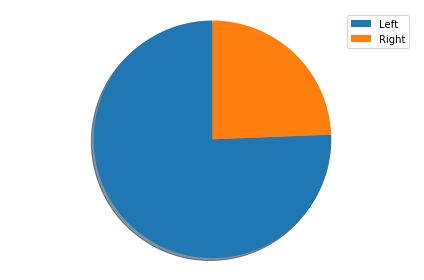

1 ST [514, 89]


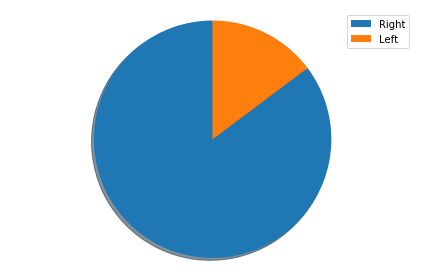

2 RM [536, 147]


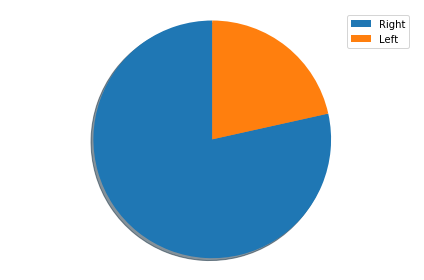

3 RB [674, 16]


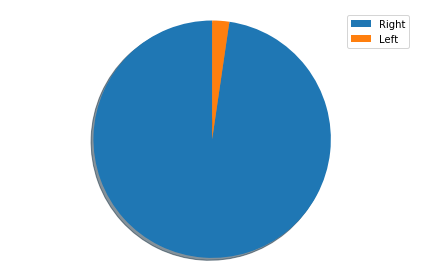

4 LM [481, 192]


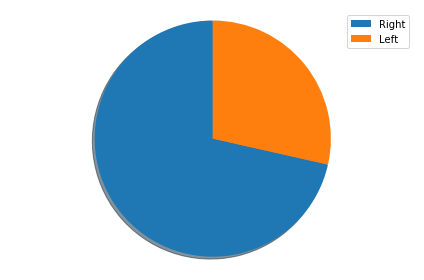

5 CB [336, 83]


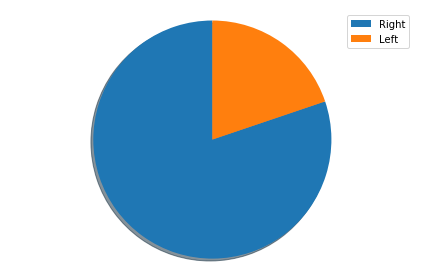

6 CM [704, 219]


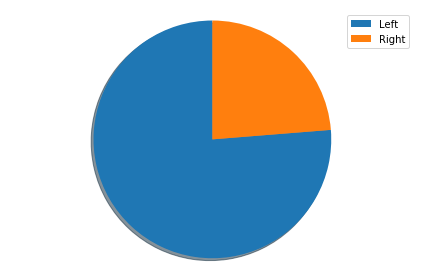

7 LB [446, 220]


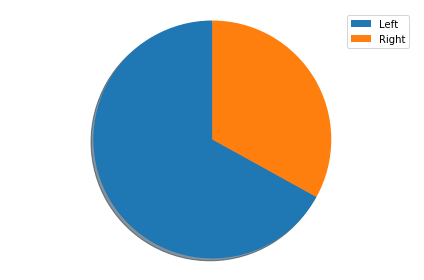

In [35]:
for index, position in enumerate(fifa_data['Position'].unique().tolist()):
    position_foots = fifa_data[fifa_data['Position'] == position]['Preferred Foot']
    pf_count = position_foots.value_counts().tolist()
    labels = position_foots.unique().tolist()
    print(index, position, pf_count)
    plt.figure(index)
    patches, texts = plt.pie(pf_count, shadow=True, startangle=90)
    plt.legend(patches, labels, loc="best")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

Rozkład `Preferred Foot` pomiedzy kategoriami `Position`

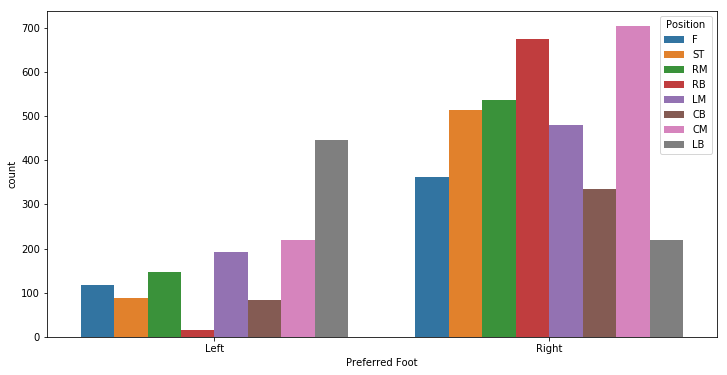

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(x='Preferred Foot', data=fifa_data, hue='Position')